# BONUS PART Implement the solution to the heat equation for images (40 points):

- Follow the slides and create an ipython notebook called heatImage.ipynb that implements the numerical solution to the 2D heat equation using an image as the starting “temperature” L(i,j,n), where i,j index pixels and n indexes the time step.

- The easiest way is to simply use the final equation on the final slide and loop over all
pixels to create the next estimate of L(i,j,n+1). You have to be a little careful with how
you treat the pixels at the edge.
- Use the sunflower image from above and run 100 time steps, plotting the result every
10 time steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

from tqdm import tqdm

shape : (640, 960, 3) 


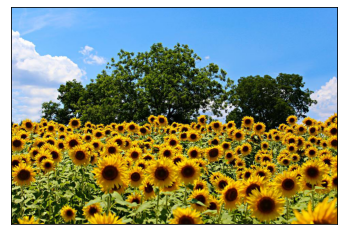

In [2]:
img_name = 'sunflower'
img = plt.imread(img_name+'.png')
print('shape : {} '.format(img.shape))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

## Heat Equation

$$
L_{i,j}^{(n+1)} = L_{i,j}^{(n)}+\Delta t[\frac{L_{i+1,j}^{(n)}-2*L_{i,j}^{(n)}+L_{i-1,j}^{(n)}}{(\Delta x)^2}+ \frac{L_{i,j+1}^{(n)}-2*L_{i,j}^{(n)}+L_{i,j-1}^{(n)}}{(\Delta y)^2}]
$$

In [32]:
def heat_blur(L, T, plot_i, dx=2, dy=2, dt=1):
    '''
    Heat images T times at interval of time step
    
    - L : image
    - T : time step (loop)
    - plot_i : plotting interval
    - dx : delta x, left-shift(|-1|) + right-shift(|+1|) = 2
    - dy : delta y, up-shift(|+1|) + down-shift(|-1|) = 2
    - dt : delta t
    '''
    # convert image to numpy array
    L = np.array(img)

    # get width, height, channel
    w,h,c = L.shape

    print("width : {}, height : {}, channel: {}, loop:{}".format(w,h,c,T))

    # blurring which obeys the heat equation
    for t in range(T):
        L_next = np.zeros_like(L)
        
        # for each color channel
        for k in range(c):
            # for each pixel
            for i in range(h):
                for j in range(w):
                    # for i
                    ## NEXT(+1)
                    if i+1==h:
                        L_next_i = L[j,i,k]
                    else:
                        L_next_i = L[j,i+1,k]
                    ## PREIVIOUS(-1)
                    if i-1<0:
                        L_prev_i = L[j, i, k]
                    else: 
                        L_prev_i = L[j, i-1, k]
                    # for j
                    ## NEXT(+1)
                    if j+1==w:
                        L_next_j = L[j,i,k]
                    else:
                        L_next_j = L[j+1,i,k]
                    ## PREIVIOUS(-1)
                    if j-1<0:
                        L_prev_j = L[j, i, k]
                    else: 
                        L_prev_j = L[j-1, i, k]

                    # Heat Equation(Laplacian update)
                    L_next[j, i, k] = L[j, i, k] + dt*((L_next_i -2*L[j, i, k]+ L_prev_i)/dx**2) +  ((L_next_j -2*L[j, i, k]+ L_prev_j)/dy**2)

        # Update for next time step
        L = L_next

        # display Image every plot_i steps
        if (t+1)%plot_i ==0:
            plt.imshow(L)
            plt.xticks([])
            plt.xticks([])
            plt.title('t = %d th Image' %(t+1))
            plt.show()


width : 640, height : 960, channel: 3, loop:100


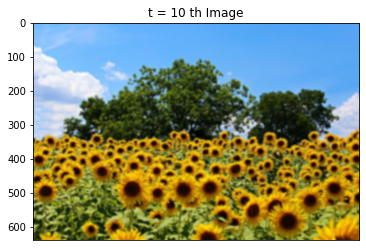

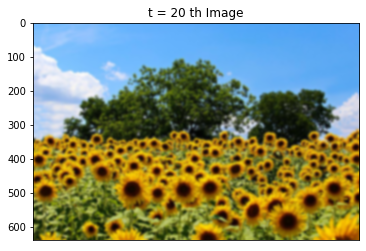

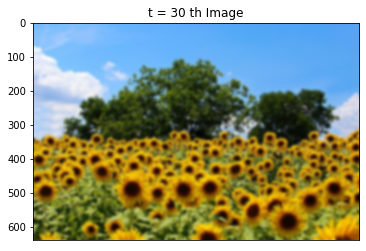

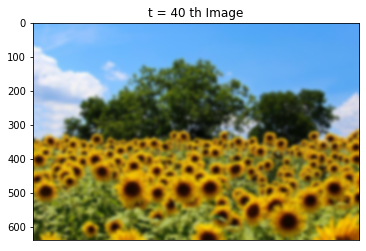

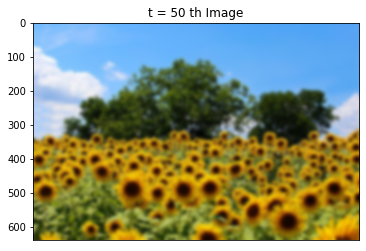

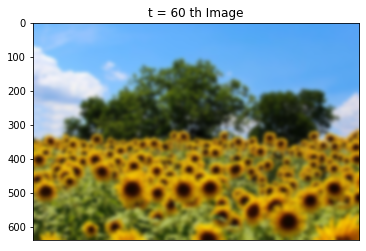

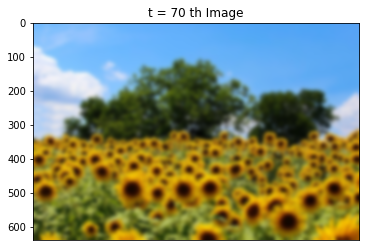

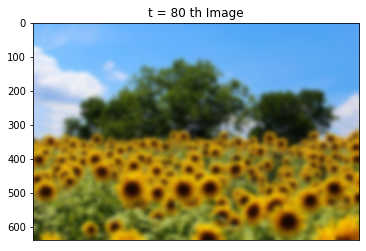

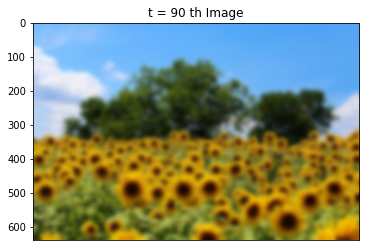

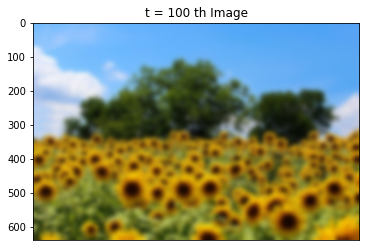

In [33]:
# test with T = 100 (plotting every 10 timestep)
heat_blur(L=img, T=100, plot_i=10, dx=2, dy=2, dt=1)

## Result

We first defined the heat equation function as we discussed it during the class. In order to get L(i,j,n+1) using Heat Equation, we defined all L(i+1,j,n), L(i+1,j,n), L(i,j+1,n), L(i,j-1,n) and then inserted does values to the equation. As mentioned in the equation, *we used `if` to avoid errors while going through for loops.*